# k-means clustering from scratch, using numpy

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def generate_bivariate_data(n_clusters):
    np.random.seed(6)
    obs = np.empty((0,2))
    real_clusters = np.empty((0,))
    for c in range(n_clusters):
        cluster_obs = np.random.multivariate_normal(mean=[c*1.5, 2], cov=[[0.05, 0], [0, 0.05]], size=1000)
        obs = np.concatenate([obs, cluster_obs])
        real_clusters = np.concatenate([real_clusters, np.array([c]*1000)])

    return obs, real_clusters


def plot_clusters(data, clusters):
    df = pd.DataFrame(data, columns = ['var1', 'var2'])
    df['cluster'] = clusters
    df['cluster'] = df['cluster'].astype(str)

    sns.scatterplot(data=df, x='var1', y='var2', hue='cluster')
    plt.show()


def kmeansclustering(obs:np.array, n_clusters:int, maxiter:int=100, maxflat:int=5, tol:float=0.01):
    np.random.seed(6)

    # initialise the centroids as random points selected from the dataset
    initial_centroids_i = np.random.choice(obs.shape[0], n_clusters, replace=False)  
    centroids = obs[initial_centroids_i,:]

    # initialise the distance matrix as an empty array with rows = tot obs and columns = n_clusters, 
    # distance_matrix[i][j] will be distance of obs i from cluster j
    distance_matrix = np.zeros((obs.shape[0], n_clusters))

    # keep track of the average distance between points and their cluster centroid
    # the stopping rule for the loop is a variation in avg. distance < tolerance level "tol" or a number
    # of iterations > maxiter
    prev_distance = np.inf
    flat = 0
    count = 0

    while flat < maxflat and count < maxiter:
        for c in range(n_clusters):
            # save distance from obs to each of the centroids into distance matrix
            distance_matrix[:, c] = np.linalg.norm(obs - centroids[c], axis=1)

        # the obs is assigned to the cluster represented by the nearest centroid
        clusters = np.argmin(distance_matrix, axis=1)

        # average distance between points and their cluster centroid
        avg_distance = np.mean(distance_matrix[range(len(distance_matrix)), clusters])

        # if variation < tol this iteration counts as a "flat" iteration
        if abs(prev_distance - avg_distance) < tol:
            flat += 1

        prev_distance = avg_distance

        for c in range(n_clusters):
            # compute the new centroids as clusters means
            cluster_obs = obs[np.where(clusters == c)[0], :]
            centroids[c] = np.mean(cluster_obs, axis=0)
    
    return clusters

In [12]:
n_clusters = 5

obs, real_clusters = generate_bivariate_data(n_clusters)

clusters = kmeansclustering(obs, n_clusters=5)

c:\Users\Andrea.Zoccatelli\AppData\Local\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andrea.Zoccatelli\AppData\Local\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andrea.Zoccatelli\AppData\Local\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Andrea.Zoccatelli\AppData\Local\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

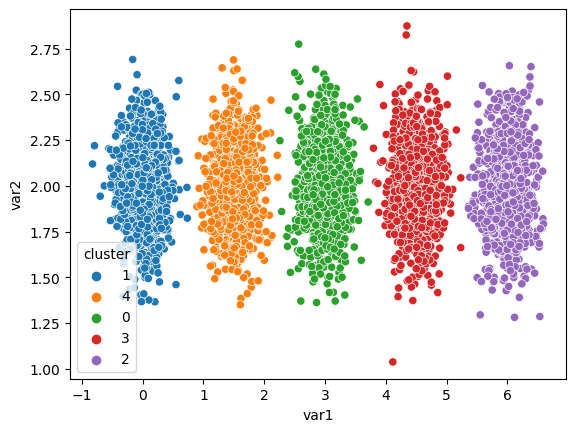

In [13]:
plot_clusters(obs, clusters)